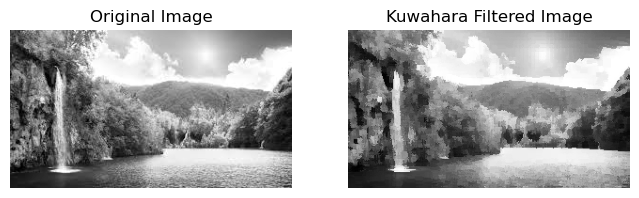

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def kuwahara_filter(img, window_size=5):
    """Applies Kuwahara filter to the input image."""
    offset = window_size // 2
    padded_img = np.pad(img, ((offset, offset), (offset, offset)), mode='symmetric')
    output = np.zeros_like(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            regions = [
                padded_img[y:y+offset+1, x:x+offset+1],
                padded_img[y:y+offset+1, x+offset+1:x+2*offset+1],
                padded_img[y+offset+1:y+2*offset+1, x:x+offset+1],
                padded_img[y+offset+1:y+2*offset+1, x+offset+1:x+2*offset+1]
            ]
            variances = [np.var(region) for region in regions]
            output[y, x] = np.mean(regions[np.argmin(variances)])
    return output

# Load the image and convert to grayscale
image = cv2.imread('Nature.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Kuwahara filter
kuwahara_result = kuwahara_filter(image, 5)

# Display the result
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kuwahara_result, cmap='gray')
plt.title('Kuwahara Filtered Image')
plt.axis('off')

plt.show()

Explanation:
The Kuwahara filter is a non-linear smoothing filter that preserves edges. It divides the image into overlapping 
regions and computes the variance for each region, then replaces the central pixel with the mean value of the 
region with the smallest variance.
